*__Alejandro Gonzalez Garcia__
<br>
Date: Mar. 28, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 30: Signal processing</font></center>

Here we consider further some aspects of DFTs and their uses, which goes under the general topic of signal processing.



## <font color=#46769B>Introduction</font>


The goals of this exercise are:
- Continue with further topics related to DFTs

Required reading:
- *Lesson 13: Discrete Fourier Transform*




## <font color=#46769B>Exercise</font>

Here we will load data for the [total US energy consumption for the year 2021](https://www.eia.gov/), from Jan. 1 to Dec. 31. The data itself is a list of $24\times 365$ hourly entries for the energy consumption in each hour for the year 2021. Here is how to load the data and make a plot, hopefully illustrating what it means.

The energy consumption is our function $f(t)$, for which we only have discrete data $f_n$ at hourly times $t_n$. The data is complicated, but at the same time there is structure, with variation occuring over particular time scales. The goal here is to explore how we can use DFT to understand this data. What information is in this data and how can we extract it?



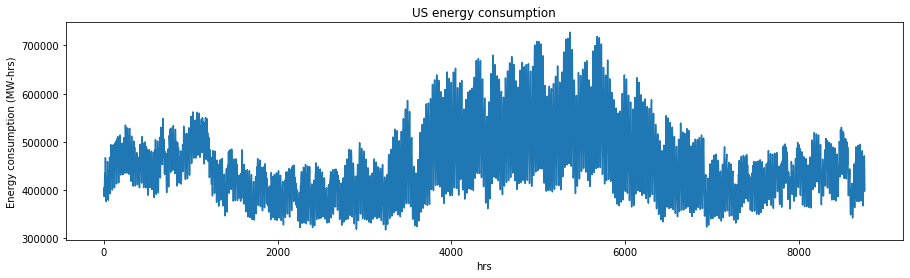

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fn = np.loadtxt("https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/data/US_electricity_data_2021.csv")

tn = range(len(fn))

plt.figure(figsize=(15,4))
plt.plot(tn,fn)

plt.xlabel('hrs')
plt.ylabel('Energy consumption (MW-hrs)')
plt.title('US energy consumption')
plt.show()

Your tasks are as follows:

- Perform a DFT on the data, `f_n`, to calculate the Fourier coefficients $c_k$. Before you take the DFT, subtract the mean value of `data` since we are interested in how energy consumption varies in time.

Next, the __power spectrum__ (also known as the __periodogram__) are the *magnitudes* of the Fourier coefficients *squared*, $|c_k|^2$. The power $|c_k|^2$ in a given mode $k$ tells us which Fourier modes have the largest oscillations, and therefore are the most important. It is helpful to label each Fourier mode not by $k$ (which depends on how our data is sampled) but by the corresponding frequency $\nu_k$. (Here, we work with *frequency* $\nu_k$, not the *angular frequency* $\omega_k = 2\pi \nu_k$.) Given $k$, $\nu_k$ is for that mode is

$$\nu_k = \frac{k}{T} = \frac{k h^{-1}}{N}$$

where $T$ is the total interval (here, $T = 24 \times 365 = 8760$ hours) or equivalently $h^{-1} = 1/{\rm hour}$ is the *sampling rate*, with $N = 24 \times 365 = 8760$ samples. 

- Plot the periodogram as a function of frequency. Determine which time scale has the most power, i.e., find the largest value of $|c_k|^2$ and determine the corresponding time scale $\nu_k^{-1}$ in hours.

Next, investigate whether there is a *weekly* modulation in the data. That is, does energy consumption vary over the time scale with frequency $\nu_k \sim 1/{\rm week} = 1/(168 \; {\rm hours})$. (Recall this is during the height of the lockdown, so maybe everyone was staying home all the time and not varying their energy consumption over the week.)

- Apply a __bandpass filter__ to your Fourier coefficients by setting all values of $c_k$ to zero except those with frequencies in the range
$$0.9/{\rm week} < \nu_k < 1.1/{\rm week} \, .$$
Perform the inverse DFT with your bandpassed Fourier coefficients to construct a new $f(t)$, i.e., plug in the Fourier coefficients $c_k$ into the Fourier series for $f(t)$ and evaluate it at the discrete times steps, $t_n$, to calculate the bandpassed data $f_n$. Make a plot of your new $f_n$ with the $f_n$ values directly from the data (plotted above).

- Repeat the previous step, except only apply a __low-pass filter__, $\nu_k < 1.1/{\rm week}$, such that high frequencies (variation happening on time scales shorter than a week) are excluded.



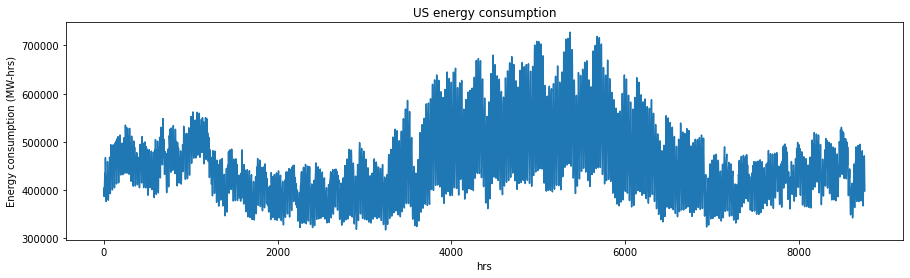

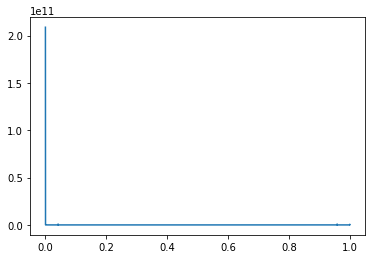

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

fn = np.loadtxt("https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/data/US_electricity_data_2021.csv")



tn = range(len(fn))

plt.figure(figsize=(15,4))
plt.plot(tn,fn)

plt.xlabel('hrs')
plt.ylabel('Energy consumption (MW-hrs)')
plt.title('US energy consumption')
plt.show()

N = len(fn)

ck = np.zeros(N,dtype='complex')

average_data = np.mean(fn)

fn_new = fn - average_data 

for k in range(N):
  n = np.array(range(N))

  ck[k] = 1/N * np.sum(fn * np.exp(-2j*np.pi*(k)*n/N))


vk = np.zeros(N)

for k in range(N):
  T = 8760
  vk[k] = (k) / T

ck_magnitudes = np.abs(ck)**2


plt.plot(vk,ck_magnitudes)
plt.show()